## Lead Scoring Case Study

## Approach
Based on the business problem and looking at the dataset at a high level, below steps will be followed to solve the case study problem :-

- Data Understanding and Inspection
- Data Cleaing
    - Missing Value check and Imputation
- EDA 
    - Univariate Analysis
    - Bivariate Analysis
    - Outlier Detection and Treatment
- Data Preparation
    - Dummy Variable Creation
    - Train Test Split
    - Feature Scaling
- Model Building on Training Data Set
    - Feature Selection by RFE
    - Multi Collinearity Validation and Removal
    - Confusion Matrix
- ROC Curve Analysis
- Finding Optimal cut off 
- Metrics Calculation
    - Precision and Recall trade off
    - Accuracy, Sensitivity, Specificity, TPR, FPR, F1_Score
- Model Prediction on Test Data Set
    - Metrics Validation (Accuracy, Sensitivity, Specificity, TPR, FPR, F1_Score, Precision, Recall)
- Final Analysis & Outcome
    - Lead Scoring
    - Train Vs Test Metrics
    - Classification Report
    - Top Predictors or Features
    - Top Predictors vs Relative Importance
- Conlclusion

In [1]:
import pandas as pd, numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Understanding

In [3]:
# Importing dataset
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
lead_data.shape

(9240, 37)

**Insight** - There are total 9240 rows and 37 cols in the dataframe

## Data Duplicate Check

In [5]:
lead_dup = lead_data.copy()
lead_dup.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
# Checking for duplicates and dropping the entire duplicate row if any
lead_dup.drop_duplicates(subset=None, inplace=True)
lead_dup.shape

(9240, 37)

**Insight** - As the shape after executing the drop duplicate is same. Hence, we can conclude that there is zero duplicate values in the dataframe

## Data Inspection

In [7]:
lead_data.shape

(9240, 37)

In [8]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

**Insight** - As we observed from the info that there are multiple columns with missing values and from the statistical description that couple of variables have high data outliers. 

## Data Cleaning

As we can observe that there are select values for many column. This is because customer did not select any option from the list, hence it shows select. Select values are as good as NULL.  
Converting 'Select' values to NaN.

In [10]:
lead_data = lead_data.replace('Select', np.nan)
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [11]:
# Missing Value check
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# percentage view of missing value
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# we will drop the columns having more than 40% of missing values.
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>=40)].columns, 1)
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

In [15]:
len(lead_data.columns)

30

In [16]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
#dropping Lead Number and Prospect ID since they have all unique values
lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [18]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No          

### Missing Value Treatment

In [19]:
# checking value counts of city columns
lead_data.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [20]:
# checking value counts of specialization columns
lead_data.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

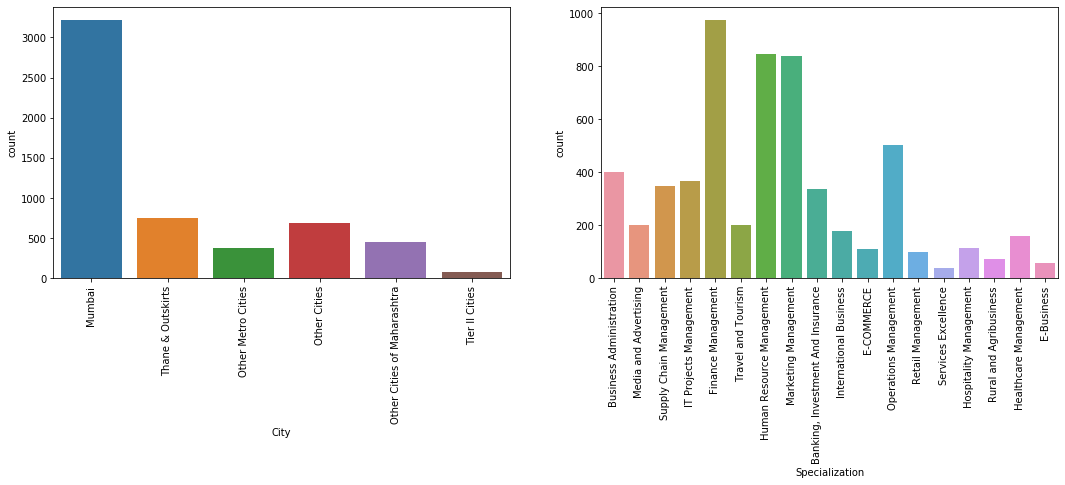

In [21]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['City'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation = 90)
plt.show()

**Insight** - 
- As 57.8% of the data has City = Mumbai. So, imputing missing value with the mode value
- As not selecting a Specialization could mean that lead do not have any specialization or a student. So we will categorise them into a derived category 'Others'.

In [22]:
lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')
lead_data.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [23]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')
lead_data.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [24]:
# checking value counts of What matters most to you in choosing a course columns
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# checking value counts of What is your current occupation columns
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

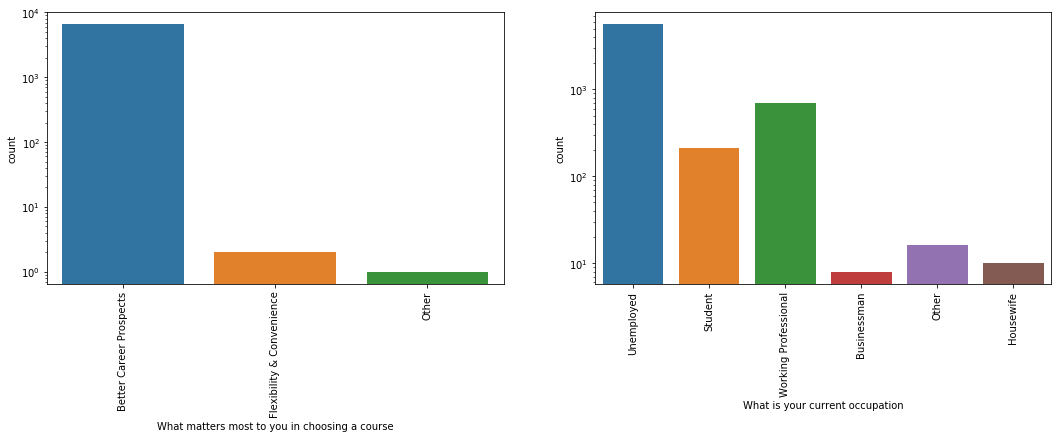

In [26]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.subplot(1,2,2)
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

**Insight** - 
- As 99% of the data has 'Better Career Prospect'. So, imputing missing value with the mode value
- As 85% of the data has status 'Unemployed'. So, imputing missing value with the mode value

In [27]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')
lead_data['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Checking value counts of country
lead_data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Kuwait                  0.000590
Nigeria                 0.000590
Canada                  0.000590
South Africa            0.000590
Germany                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Uganda                  0.000295
Philippines             0.000295
Bangladesh              0.000295
Italy                   0.000295
Netherlands             0.000295
Liberia                 0.000148
Russia                  0.000148
Malaysia  

In [30]:
lead_data.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

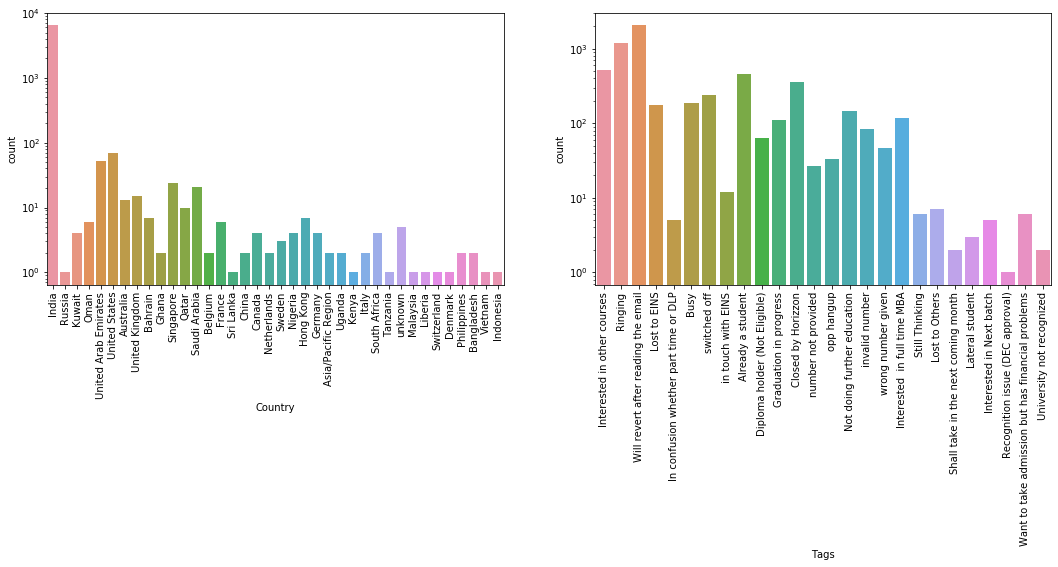

In [31]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['Country'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.subplot(1,2,2)
sns.countplot(lead_data['Tags'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [32]:
# As we can clearly see 95% of the data has country = India, so imputing missing values with the Mode
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')
lead_data.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
China                      2
Uganda                     2
Philippines                2
Bangladesh                 2
Italy                      2
Netherlands                2
Liberia                    1
Russia                     1
Malaysia                   1
Sri Lanka                  1
Indonesia                  1
Denmark                    1
Vietnam       

In [33]:
# Imputing missing values with Others, as it is generally Unknown sources
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Others')
lead_data.Tags.value_counts()

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [34]:
# checking null information again
lead_data.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [35]:
# checking null percentage information again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [36]:
# Rest missing values are <= 1.5% so we can drop such rows
lead_data.dropna(inplace = True)

In [37]:
lead_data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [38]:
len(lead_data)* 100 / len(lead_dup)

98.2034632034632

**Insight** - After performing all data cleaning and missing values imputation we still have 98.2% original rows available for EDA, which is indeed a satisfactory number to assure that there is no major loss of data during missing value treatment

In [39]:
# current shape
lead_data.shape

(9074, 28)

## EDA (Univariate/Bivariate Analysis)

Our target variable is converted that indicates whether a lead has been successfully converted = 1 or not = 0

In [40]:
# converting the variable into 1 (yes) and 0 (No)
round((sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100,2)

37.86

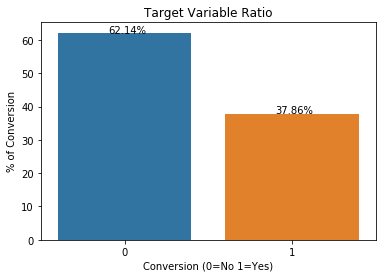

In [41]:
# Converted Data Imbalance plot

ax = sns.barplot(x='Converted', y='Converted', data=lead_data, estimator=lambda x: len(x) / len(lead_data) * 100)
ax.set(ylabel='Percent')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.ylabel('% of Conversion')
plt.show()

**Insight** - Our Target variable is having a 62:38 ratio and seems to be properly balanced with respect to the conversion ratio. In short, we have 37.86 % of conversion in the available dataset.

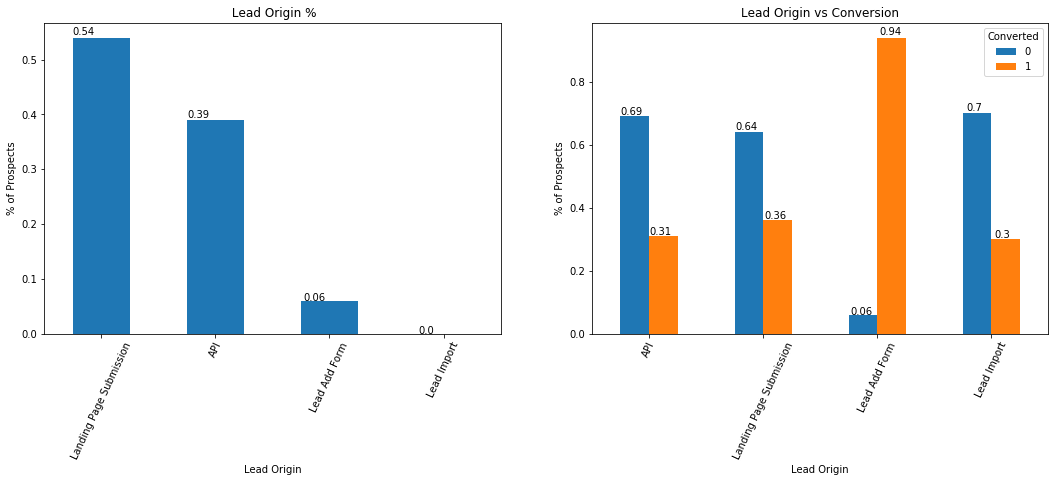

In [42]:
# Plotting w.r.t lead origin vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Lead Origin'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight** - 
- Univariate Analysis states that ~54% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API 
- Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion but count of lead originated from them are considerable
- Lead Add Form has more than 90% conversion rate but count of lead are not very high
- Lead Import count is neglible in count  

**To improve overall lead conversion rate, we need to focus more on improving lead converion of 'API' and 'Landing Page Submission' origin and generate more leads from 'Lead Add Form'**

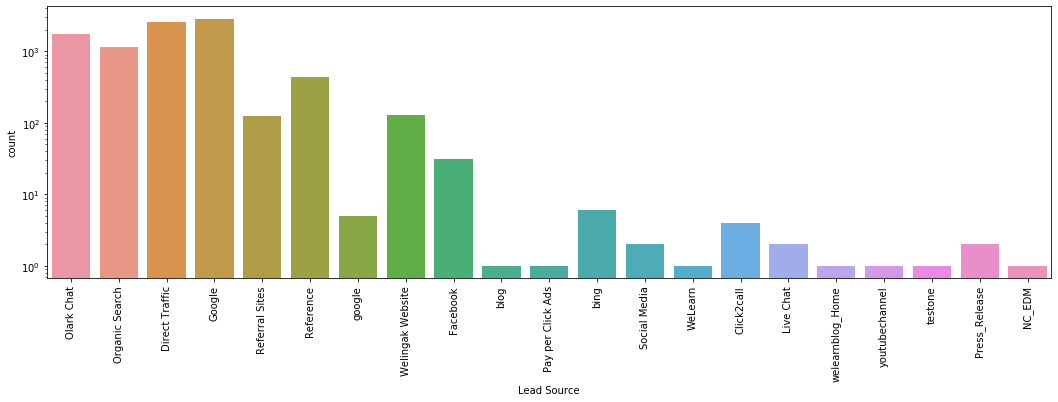

In [43]:
# Checking unique value counts of lead source
plt.figure(figsize=(18,5))
ax=sns.countplot(x = 'Lead Source', data = lead_data)
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [44]:
# Merging 2 Google into one category
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')

# Imputing Null with Others, as it is generally Unknown sources
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 
                                                        'welearnblog_Home', 'WeLearn', 'blog', 'Pay per Click Ads',
                                                        'testone', 'NC_EDM', 'Live Chat', 'Social Media'], 'Others')

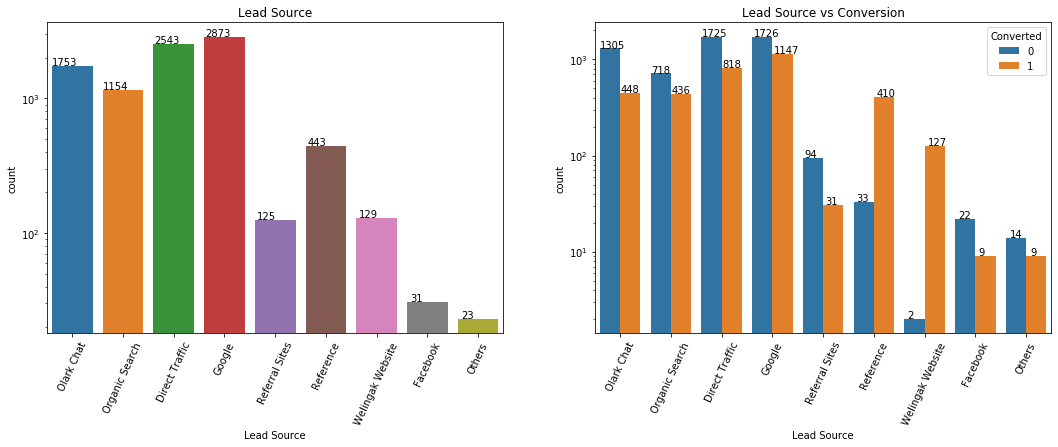

In [45]:
# Plotting lead source vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax=plt.subplot(221)
ax=sns.countplot(x = "Lead Source", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.title('Lead Source')

# Bivariate Analysis
ax=plt.subplot(222)
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.title('Lead Source vs Conversion')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight** 
- Univariate Analysis states that ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' i.e. it generates max number of leads 
- Bivariate Analysis states that 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion where as conversion rate of reference leads and leads through welingak website is high  

**To improve overall lead conversion rate, we need to focus on improving lead converion of olark chat, organic search, direct traffic and google. And generate more leads from reference and welingak website.**

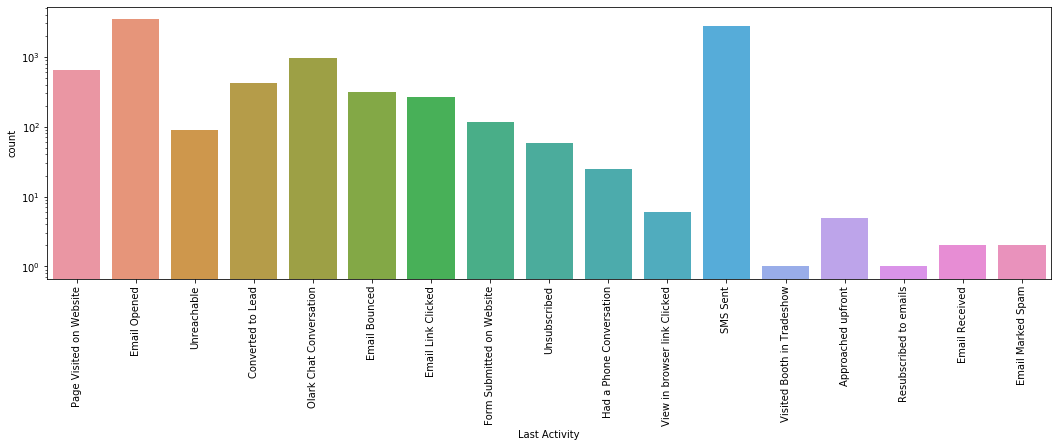

In [46]:
# Checking unique value counts of Last Activity
plt.figure(figsize=(18,5))
ax=sns.countplot(x = 'Last Activity', data = lead_data)
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [47]:
# Merging low frequency items to Others
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront',
                                                        'View in browser link Clicked','Email Received', 'Email Marked Spam',
                                                        'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

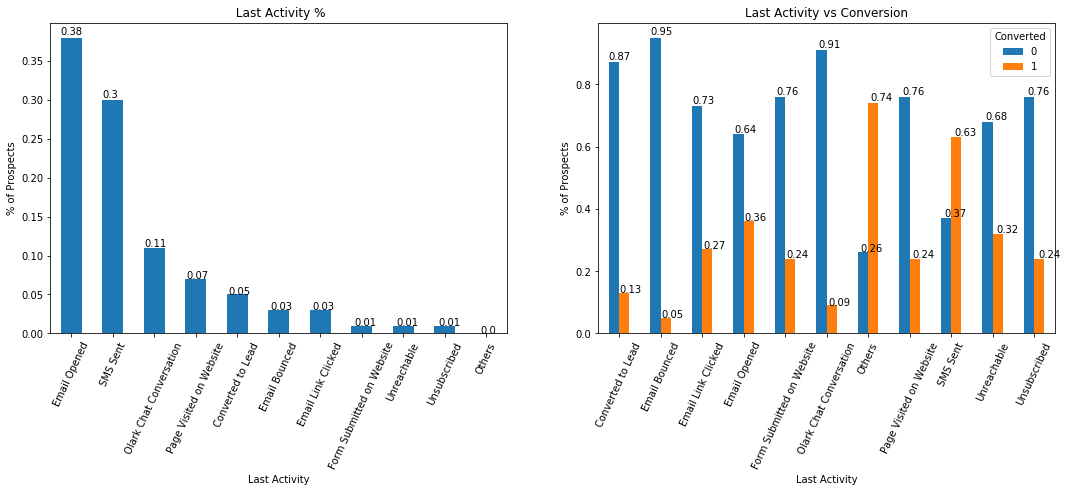

In [48]:
# Plot of last activity vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Last Activity'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~38% of the Last Activity is from 'Email Opened' followed by ~30% from 'SMS Sent' 
- Bivariate Analysis states that 'Email Opened' as a Last Activity has 36% of Conversion and 'SMS Sent' has 63% of Conversion

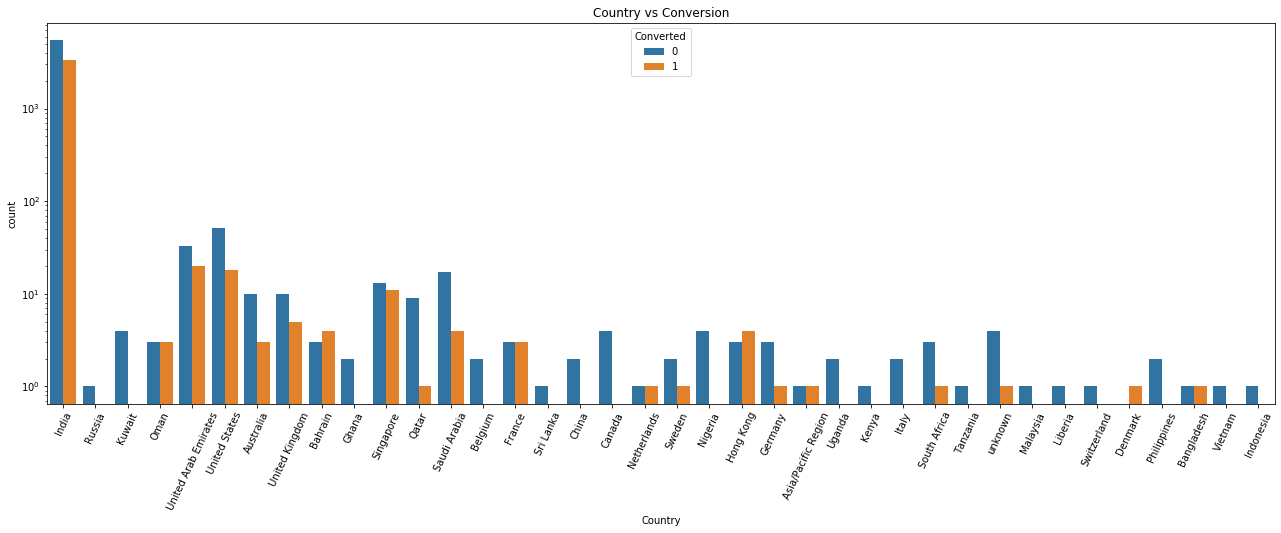

In [49]:
# Plot of country vs target variable

plt.figure(figsize=(22, 7))

# Bivariate Analysis
ax= sns.countplot(x = 'Country', hue = 'Converted', data = lead_data)
plt.xticks(rotation = 65)
plt.title('Country vs Conversion')
ax.set_yscale('log')
plt.show()

**Insight** 
- 99% of data is from 'India', we can say that core business is coming from India market
- Potential Country to make business from US, Middle East & Europe

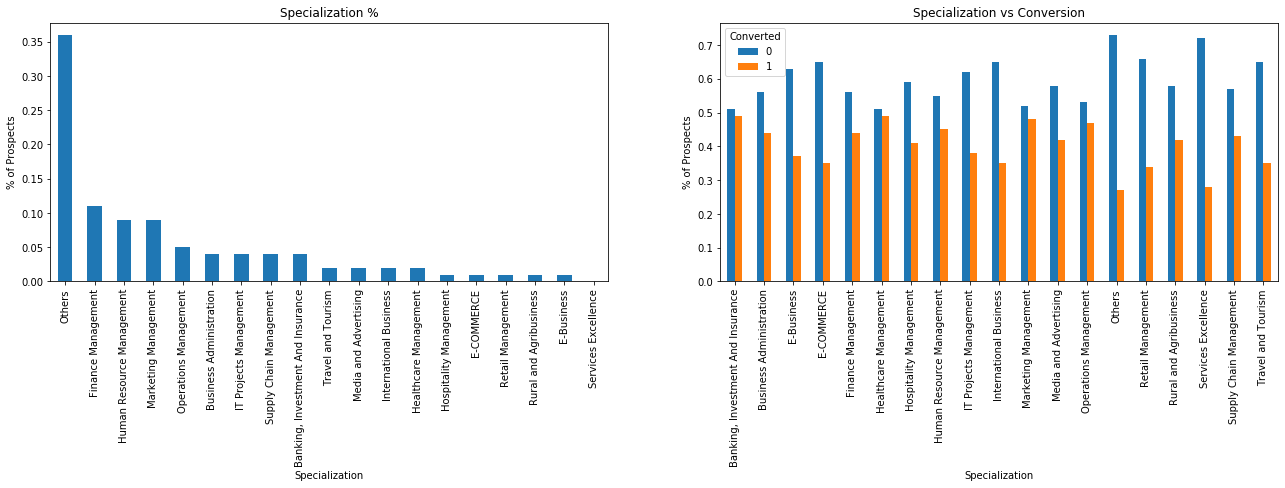

In [50]:
# Plot of Specialization vs target variable

plt.figure(figsize=(22,10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Specialization'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~40% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management' 
- Bivariate Analysis states that 'Finance Management' as a Specialization has 45% of Conversion and 'Human Resource Management' has 46% of Conversion

In [51]:
# Merging low frequency items to Others
lead_data['Tags'] = lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

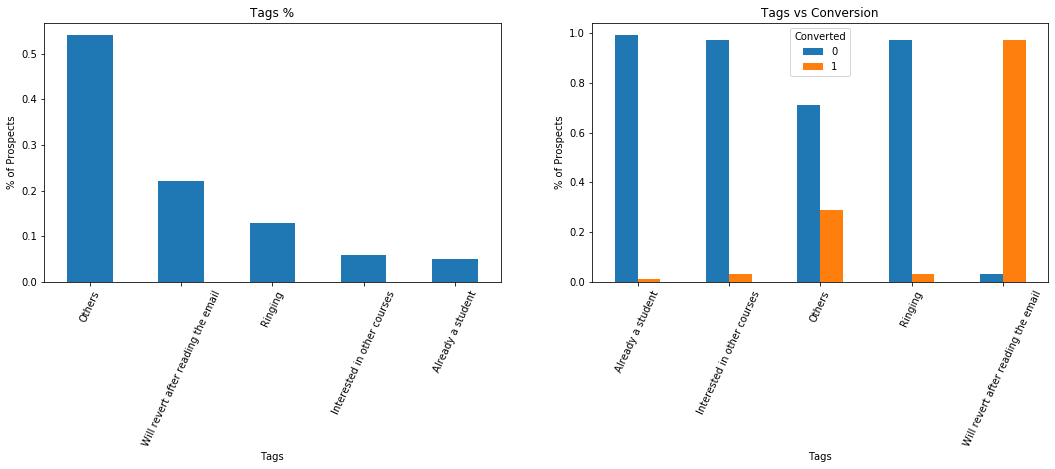

In [52]:
# plot tags vs target variable

plt.figure(figsize=(18, 10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis
ax=plt.subplot(222)
round(pd.crosstab(lead_data['Tags'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email' 
- Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion

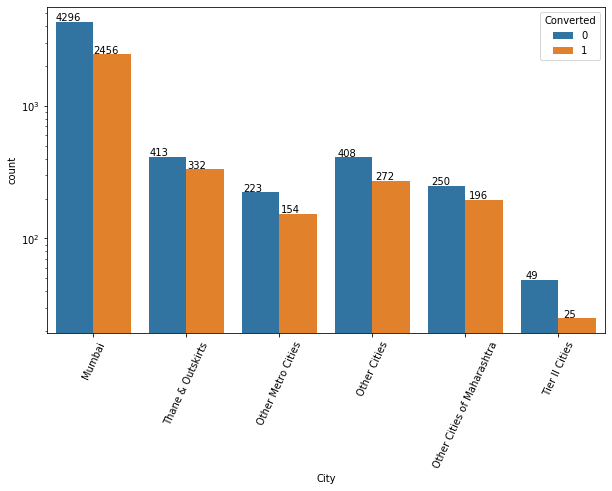

In [53]:
# plot city vs target variable

plt.figure(figsize = (10,6))
ax= sns.countplot(x = 'City', hue = 'Converted', data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.show()

**Insight**
- Bivariate Analysis states that 'Mumbai' as a City has 30% of Conversion 

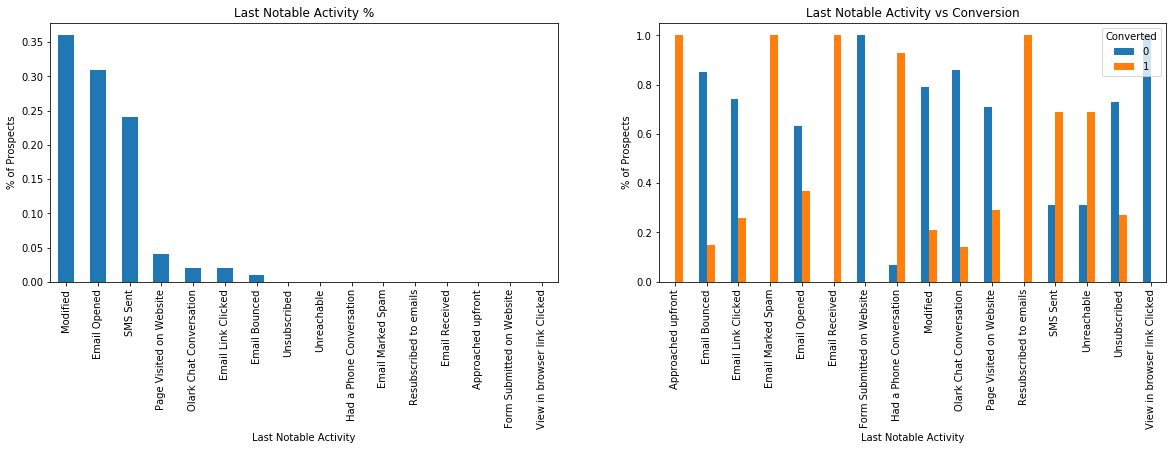

In [54]:
# plot last notable activity vs target variable
plt.figure(figsize=(20, 10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis
ax=plt.subplot(222)
round(pd.crosstab(lead_data['Last Notable Activity'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

'SMS Sent' is strong symbol for positive lead

### Outlier Analysis and Treatment

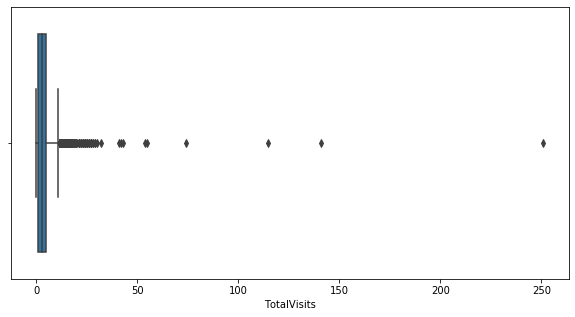

In [55]:
# plot total visits
plt.figure(figsize = (10,5))
sns.boxplot(lead_data['TotalVisits'])
plt.show()

In [56]:
# There are number of outliers in the data, We will cap the outliers to 95% value for analysis
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

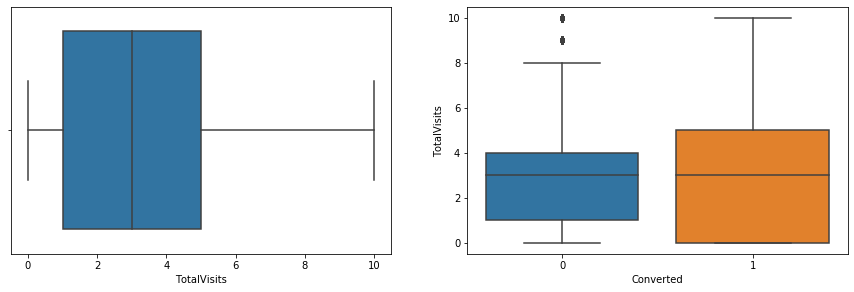

In [57]:
# plot total visits
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['TotalVisits'])
plt.subplot(222)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

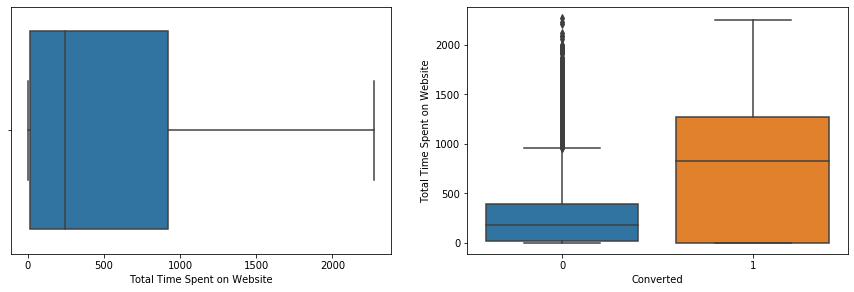

In [58]:
# plot Total Time Spent on Website
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.subplot(222)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

Leads spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

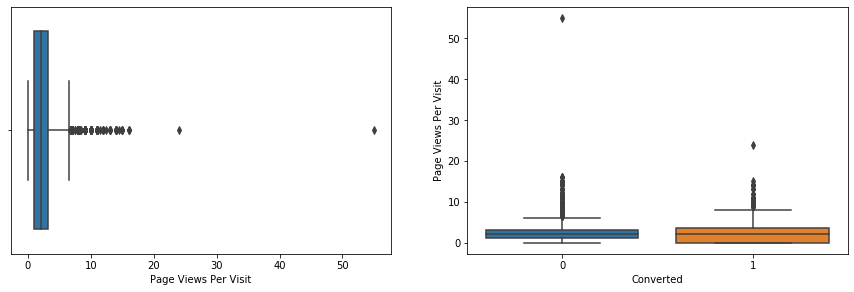

In [59]:
# plot Page Views Per Visit
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.subplot(222)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

In [60]:
# There are a number of outliers in the data, We will cap the outliers to 95% value for analysis
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

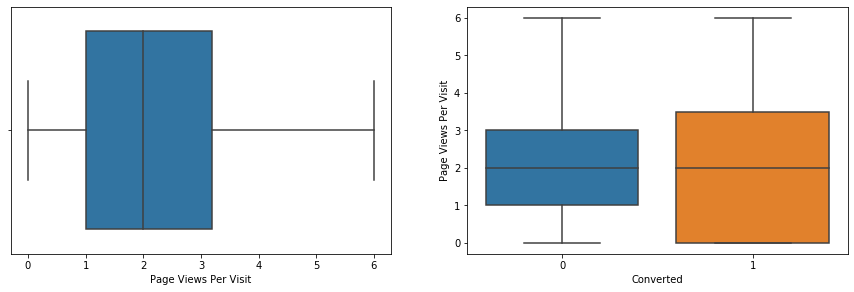

In [61]:
# plot Page Views Per Visit
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.subplot(222)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

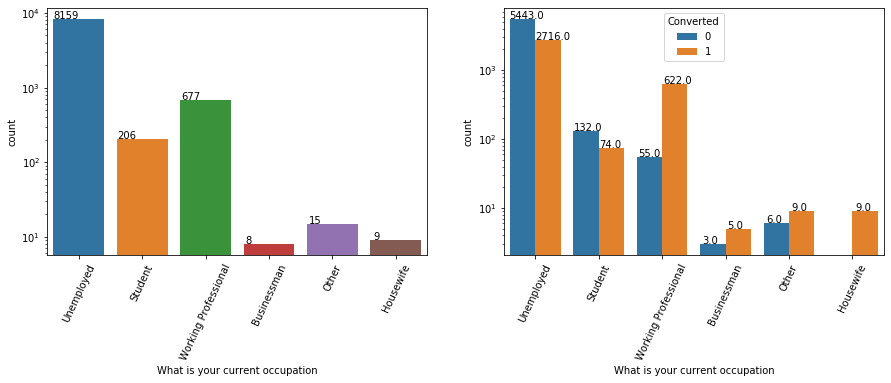

In [62]:
# plot of occupation vs target variable
plt.figure(figsize = (15,10))

# Univariate Analysis
plt.subplot(221)
ax= sns.countplot(x = "What is your current occupation", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')

# Bivariate Analysis
plt.subplot(222)
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.show()

**Insight** 
- Working Professionals going for the course have high chances of joining it
- Unemployed leads are the most in numbers but has around 30-35% conversion rate

#### Based on the EDA and data inspection we can say that there are columns  not adding any information to the model, hence we can drop them for further analysis

In [63]:
lead_data = lead_data.drop(['What matters most to you in choosing a course','Search', 'Magazine','Newspaper Article',
                    'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                    'Get updates on DM Content','I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview','Country'],1)

In [64]:
lead_data.shape

(9074, 14)

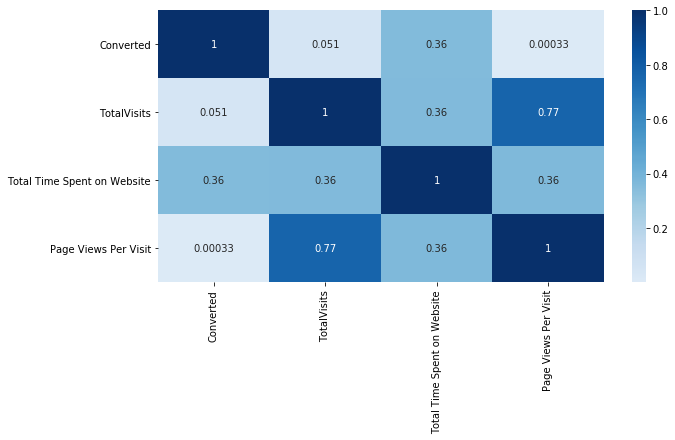

In [65]:
# exploring numerical variables and correlation check

plt.figure(figsize = (10,5))
sns.heatmap(lead_data.corr(), annot = True, cmap='Blues', center=0.423)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

**Insight** - Page Views Per Visit and Total Visits are highly correlated with correlation = 0.77

In [66]:
lead_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Others                         42
Name: Last Activity, dtype: int64

In [67]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [68]:
# Both the variables contains similar data. Hence, either of them can be dropped
lead_data.drop(['Last Notable Activity'], 1, inplace = True)

In [69]:
# checking percentage of data retained
round((100*lead_data.shape[0]/9240),2)

98.2

**Insight** - After all the process of data cleaning we managed to retain 98% of data which is really good for model building

In [70]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags    City  
0                      Unemployed          Interested in other courses  Mumbai  
1                      Unemployed                              Ringing  Mumbai  
2                         Student  Will revert after reading the email  Mumbai  
3                      Unemployed                              Ringing  Mumbai  
4                      Unemployed  Will revert after reading the email  Mumbai

## Data Preparation

In [71]:
# Converting binary variable to 0/1

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the created list
lead_data[varlist] = lead_data[varlist].apply(binary_map)
lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags    City  
0                      Unemployed          Interested in other courses  Mumbai  
1                      Unemployed                              Ringing  Mumbai  
2                         Student  Will revert after reading the email  Mumbai  
3                      Unemployed                              Ringing  Mumbai  
4                      Unemployed  Will revert after reading the email  Mumbai

### Dummy Variable Creation

In [72]:
# Creating Dummy, delete the first dummy and dropping the original
new_lead = pd.get_dummies(lead_data, drop_first=True)
new_lead.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2              

In [73]:
new_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 59 columns):
Do Not Email                                            9074 non-null int64
Do Not Call                                             9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Origin_Lead Import                                 9074 non-null uint8
Lead Source_Facebook                                    9074 non-null uint8
Lead Source_Google                                      9074 non-null uint8
Lead Source_Olark Chat                               

In [74]:
new_lead.shape

(9074, 59)

In [75]:
# Putting feature variable to X
X = new_lead.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0    

In [76]:
X.shape

(9074, 58)

In [77]:
# Putting response variable to y
y = new_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Test - Train Split

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=333)

In [79]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7635             1            0          1.0                          345   
7276             0            0          3.0                          641   
8724             0            0          3.0                          389   
8314             0            0         10.0                         1002   
5033             0            0         10.0                          302   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7635                  1.00                                    1   
7276                  1.50                                    0   
8724                  3.00                                    1   
8314                  3.67                                    1   
5033                  3.50                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
7635                          0                        0   
7276                          0                        0   
8724                          0                        0   
8314                          0                        0   
5033                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
7635                     0                   0                       0   
7276                     0                   1                       0   
8724                     0                   0                       0   
8314                     0                   0                       0   
5033                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
7635                           0                   0                      0   
7276                           0                   0                      0   
8724                           1                   0                      0   
8314                           1                   0                      0   
5033                           1                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
7635                           0                             0   
7276                           0                             0   
8724                           0                             0   
8314                           0                             0   
5033                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7635                            1                                 0   
7276                            0                                 0   
8724                            0                                 0   
8314                            0                                 0   
5033                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7635                           0                                        0   
7276                           1                                        0   
8724                           0                                        0   
8314                           0                                        0   
5033                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7635                                      0                     0   
7276                                      0                     0   
8724                                      0                     0   
8314                                      0                     1   
5033                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
7635                                      0                       0   
7276           

In [80]:
X_train.shape

(6351, 58)

In [81]:
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1461             0            0          5.0                           71   
7926             0            0          4.0                          233   
1909             0            0          5.0                          431   
8971             0            0          4.0                         1776   
5310             0            0          4.0                          101   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1461                  5.00                                    0   
7926                  1.33                                    0   
1909                  2.50                                    1   
8971                  4.00                                    1   
5310                  4.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1461                          0                        0   
7926                          0                        0   
1909                          0                        0   
8971                          0                        0   
5310                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1461                     0                   1                       0   
7926                     0                   0                       0   
1909                     0                   1                       0   
8971                     0                   0                       0   
5310                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1461                           0                   0                      0   
7926                           0                   0                      0   
1909                           0                   0                      0   
8971                           0                   0                      0   
5310                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1461                           0                             0   
7926                           0                             0   
1909                           0                             0   
8971                           0                             0   
5310                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1461                            0                                 0   
7926                            0                                 0   
1909                            0                                 0   
8971                            0                                 0   
5310                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1461                           0                                        0   
7926                           0                                        0   
1909                           1                                        0   
8971                           1                                        0   
5310                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1461                                      1                     0   
7926                                      1                     0   
1909                                      0                     0   
8971                                      0                     0   
5310                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1461                                      0                       0   
7926           

In [82]:
X_test.shape

(2723, 58)

In [83]:
y_train.shape

(6351,)

In [84]:
y_test.shape

(2723,)

### Feature Scaling - Numerical Variable

In [85]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7635             1            0    -0.784333                    -0.257637   
7276             0            0    -0.064232                     0.285801   
8724             0            0    -0.064232                    -0.176855   
8314             0            0     2.456122                     0.948575   
5033             0            0     2.456122                    -0.336582   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7635             -0.699980                                    1   
7276             -0.421900                                    0   
8724              0.412342                                    1   
8314              0.784970                                    1   
5033              0.690423                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
7635                          0                        0   
7276                          0                        0   
8724                          0                        0   
8314                          0                        0   
5033                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
7635                     0                   0                       0   
7276                     0                   1                       0   
8724                     0                   0                       0   
8314                     0                   0                       0   
5033                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
7635                           0                   0                      0   
7276                           0                   0                      0   
8724                           1                   0                      0   
8314                           1                   0                      0   
5033                           1                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
7635                           0                             0   
7276                           0                             0   
8724                           0                             0   
8314                           0                             0   
5033                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7635                            1                                 0   
7276                            0                                 0   
8724                            0                                 0   
8314                            0                                 0   
5033                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7635                           0                                        0   
7276                           1                                        0   
8724                           0                                        0   
8314                           0                                        0   
5033                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7635                                      0                     0   
7276                                      0                     0   
8724                                      0                     0   
8314                                      0                     1   
5033                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
7635                                      0                       0   
7276           

In [86]:
## Checking the conversion Rate
sum(new_lead['Converted'])/len(new_lead['Converted'].index)*100

37.85541106458012

We have ~38% of conversion rate

### Correlation Check

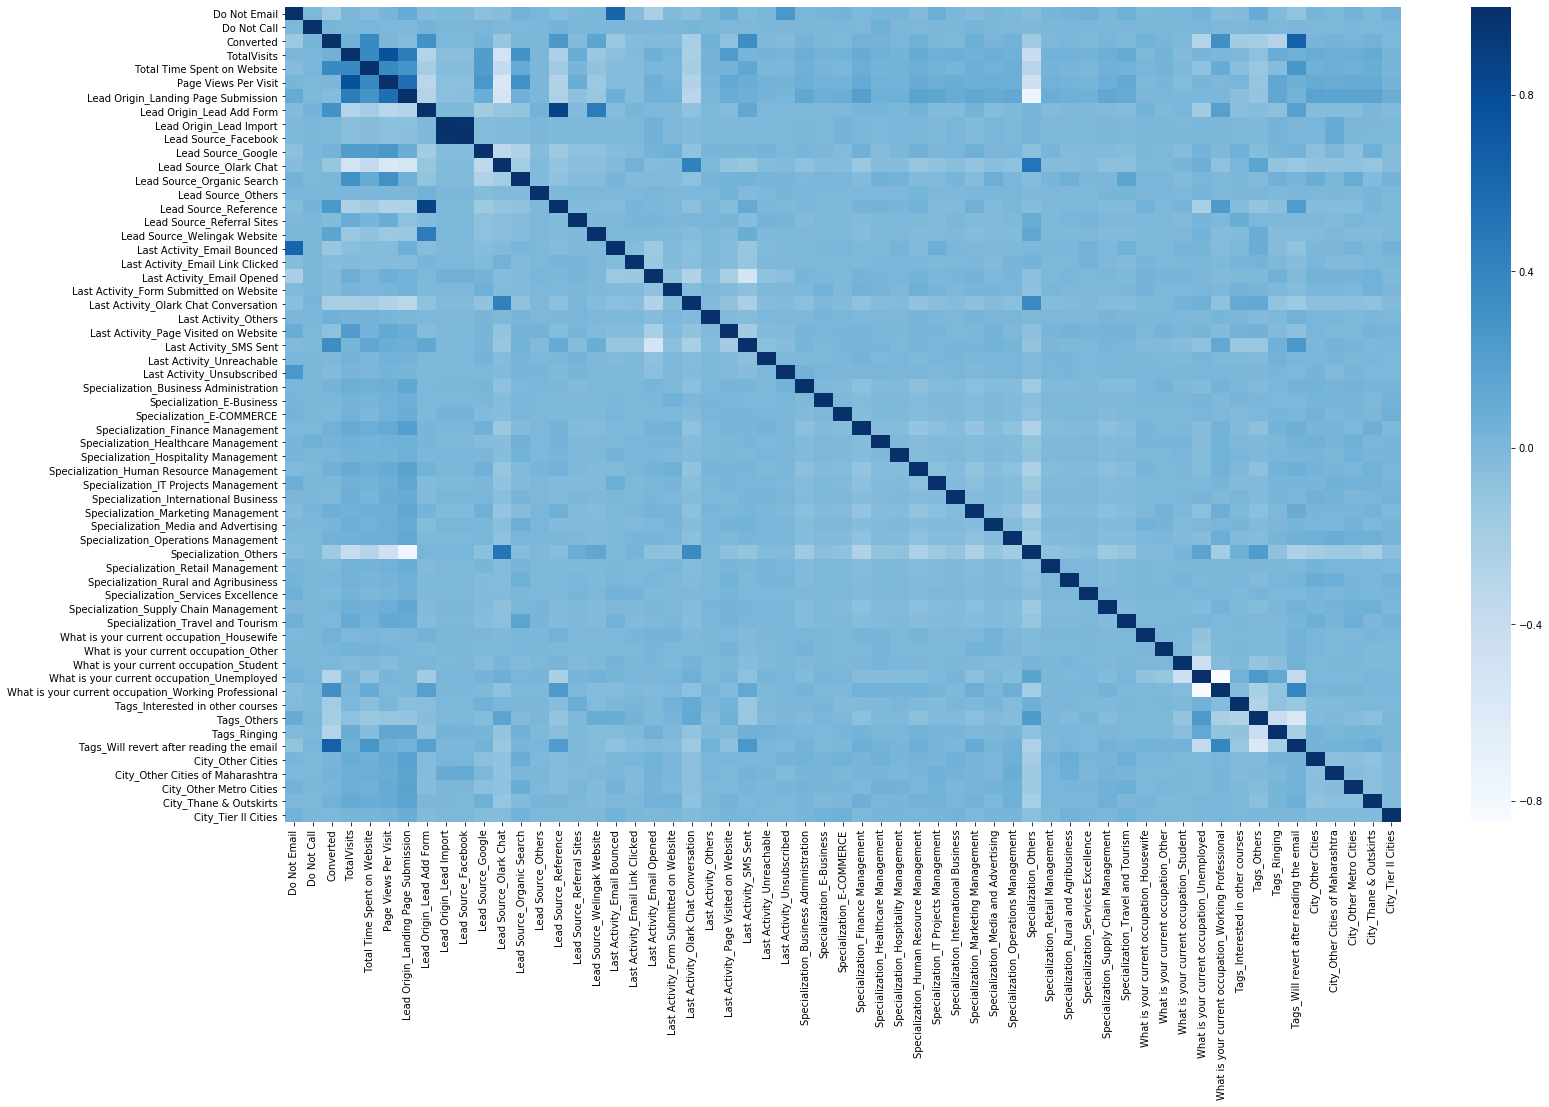

In [87]:
# plot correlation matrix 
plt.figure(figsize = (25,15))        
sns.heatmap(new_lead.corr(), cmap='Blues')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Model Building

### Model 1

In [88]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Dec 2020   Deviance:                          nan
Time:                        23:12:30   Pearson chi2:                 4.08e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.228e+15    3.1e+07  -1.04e+08      0.000   -3.23e+15   -3.23e+15
Do Not Email                                         -2.119e+14   4.48e+06  -4.73e+07      0.000   -2.12e+14   -2.12e+14
Do Not Call                                           3.233e+15   4.77e+07   6.78e+07      0.000    3.23e+15    3.23e+15
TotalVisits                                           1.442e+14   1.41e+06   1.03e+08      0.000    1.44e+14    1.44e+14
Total Time Spent on Website                            4.69e+14   1.02e+06   4.61e+08      0.000    4.69e+14    4.69e+14
Page Views Per Visit                                 -8.444e+13   1.56e+06   -5.4e+07      0.000   -8.44e+13   -8.44e+13
Lead Origin_Landing Page Submission                  -1.411e+14   3.36e+06   -4.2e+07      0.000   -1.41e+14   -1.41e+14
Lead Origin_Lead Add Form                            -2.339e+14   2.87e+07  -8.14e+06      0.000   -2.34e+14   -2.34e+14
Lead Origin_Lead Import                               1.525e+14   7.77e+06   1.96e+07      0.000    1.53e+14    1.53e+14
Lead Source_Facebook                                  1.525e+14   7.77e+06   1.96e+07      0.000    1.53e+14    1.53e+14
Lead Source_Google                                   -6.072e+13   2.46e+06  -2.47e+07      0.000   -6.07e+13   -6.07e+13
Lead Source_Olark Chat                                9.802e+13   3.91e+06    2.5e+07      0.000     9.8e+13     9.8e+13
Lead Source_Organic Search                           -4.082e+13   3.22e+06  -1.27e+07      0.000   -4.08e+13   -4.08e+13
Lead Source_Others                                    7.362e+14   1.85e+07   3.98e+07      0.000    7.36e+14    7.36e+14
Lead Source_Reference                                 1.992e+15   2.89e+07   6.89e+07      0.000    1.99e+15    1.99e+15
Lead Source_Referral Sites                           -8.668e+13   7.54e+06  -1.15e+07      0.000   -8.67e+13   -8.67e+13
Lead Source_Welingak Website                          2.674e+15   2.95e+07   9.05e+07      0.000    2.67e+15    2.67e+15
Last Activity_Email Bounced                           5.207e+14   7.37e+06   7.06e+07      0.000    5.21e+14    5.21e+14
Last Activity_Email Link Clicked                     -3.651e+14   6.44e+06  -5.67e+07      0.000   -3.65e+14   -3.65e+14
Last Activity_Email Opened                           -1.489e+14    4.4e+06  -3.38e+07      0.000   -1.49e+14   -1.49e+14
Last Activity_Form Submitted on Website                4.41e+13   8.66e+06   5.09e+06      0.000    4.41e+13    4.41e+13
Last Activity_Olark Chat Conversation                 8.086e+14   5.11e+06   1.58e+08      0.000    8.09e+14    8.09e+14
Last Activity_Others                                  5.82

### Feature Selection By RFE

In [89]:
logreg = LogisticRegression()
# running RFE with 18 variables as output (~30% of total available features)
rfe = RFE(logreg, 18)             
rfe = rfe.fit(X_train, y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 41),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_SMS Sent', True, 1),
 ('Last

In [91]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specializa

#### Model building with RFE selected features  

### Model 2

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.1
Date:                Sat, 05 Dec 2020   Deviance:                       3224.2
Time:                        23:12:32   Pearson chi2:                 9.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6077      0.395     -6.596      0.000      -3.383      -1.833
Do Not Email                                  -1.5040      0.214     -7.033      0.000      -1.923      -1.085
Total Time Spent on Website                    1.1757      0.054     21.960      0.000       1.071       1.281
Lead Origin_Lead Add Form                      0.9863      1.125      0.877      0.381      -1.219       3.192
Lead Source_Olark Chat                         1.4638      0.132     11.103      0.000       1.205       1.722
Lead Source_Reference                          3.4201      1.167      2.930      0.003       1.132       5.708
Lead Source_Welingak Website                   5.7975      1.515      3.827      0.000       2.828       8.767
Last Activity_Olark Chat Conversation         -1.5407      0.200     -7.718      0.000      -1.932      -1.149
Last Activity_Others                           1.9107      0.696      2.747      0.006       0.547       3.274
Last Activity_SMS Sent                         1.4508      0.101     14.388      0.000       1.253       1.648
Specialization_Hospitality Management         -0.6611      0.414     -1.595      0.111      -1.473       0.151
Specialization_Media and Advertising          -0.6540      0.322     -2.031      0.042      -1.285      -0.023
Specialization_Travel and Tourism             -0.8118      0.322     -2.521      0.012      -1.443      -0.181
What is your current occupation_Other         -3.0102      0.981     -3.068      0.002      -4.933      -1.087
What is your current occupation_Student       -2.2605      0.542     -4.171      0.000      -3.323      -1.198
What is your current occupation_Unemployed    -1.9842      0.290     -6.853      0.000      -2.552      -1.417
Tags_Others                                    2.8731      0.308      9.336      0.000       2.270       3.476
Tags_Ringing                                  -0.9114      0.407     -2.241      0.025      -1.709      -0.114
Tags_Will revert after reading the email       6.9752      0.350     19.933      0.000       6.289       7.661
==============================================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2                    Lead Origin_Lead Add Form  61.10
4                        Lead Source_Reference  47.12
5                 Lead Source_Welingak Website  14.92
14  What is your current occupation_Unemployed   6.31
15                                 Tags_Others   4.65
17    Tags_Will revert after reading the email   2.42
16                                Tags_Ringing   1.95
3                       Lead Source_Olark Chat   1.83
8                       Last Activity_SMS Sent   1.63
6        Last Activity_Olark Chat Conversation   1.43
1                  Total Time Spent on Website   1.42
0                                 Do Not Email   1.11
13     What is your current occupation_Student   1.05
11           Specialization_Travel and Tourism   1.04
10        Specialization_Media and Advertising   1.03
12       What is your current occupation_Other   1.01
7                         Last Activity_Others   1.01
9        Specialization_Hospitality Management   1.01

In [95]:
# dropping 'Lead Origin_Lead Add Form' due to high p-value
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 3

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.5
Date:                Sat, 05 Dec 2020   Deviance:                       3225.0
Time:                        23:12:32   Pearson chi2:                 9.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6084      0.395     -6.597      0.000      -3.383      -1.833
Do Not Email                                  -1.5056      0.214     -7.039      0.000      -1.925      -1.086
Total Time Spent on Website                    1.1750      0.054     21.954      0.000       1.070       1.280
Lead Source_Olark Chat                         1.4633      0.132     11.101      0.000       1.205       1.722
Lead Source_Reference                          4.4042      0.320     13.770      0.000       3.777       5.031
Lead Source_Welingak Website                   6.7817      1.017      6.669      0.000       4.788       8.775
Last Activity_Olark Chat Conversation         -1.5437      0.200     -7.733      0.000      -1.935      -1.152
Last Activity_Others                           1.9076      0.696      2.742      0.006       0.544       3.271
Last Activity_SMS Sent                         1.4485      0.101     14.373      0.000       1.251       1.646
Specialization_Hospitality Management         -0.6623      0.415     -1.598      0.110      -1.475       0.150
Specialization_Media and Advertising          -0.6558      0.322     -2.036      0.042      -1.287      -0.024
Specialization_Travel and Tourism             -0.8142      0.322     -2.527      0.012      -1.446      -0.183
What is your current occupation_Other         -3.0129      0.982     -3.067      0.002      -4.938      -1.088
What is your current occupation_Student       -2.2618      0.542     -4.171      0.000      -3.325      -1.199
What is your current occupation_Unemployed    -1.9816      0.290     -6.842      0.000      -2.549      -1.414
Tags_Others                                    2.8739      0.308      9.340      0.000       2.271       3.477
Tags_Ringing                                  -0.9106      0.407     -2.239      0.025      -1.708      -0.113
Tags_Will revert after reading the email       6.9830      0.350     19.957      0.000       6.297       7.669
==============================================================================================================
"""

In [97]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13  What is your current occupation_Unemployed  6.31
14                                 Tags_Others  4.65
16    Tags_Will revert after reading the email  2.41
15                                Tags_Ringing  1.95
2                       Lead Source_Olark Chat  1.83
7                       Last Activity_SMS Sent  1.63
5        Last Activity_Olark Chat Conversation  1.43
1                  Total Time Spent on Website  1.42
3                        Lead Source_Reference  1.26
0                                 Do Not Email  1.11
4                 Lead Source_Welingak Website  1.07
12     What is your current occupation_Student  1.05
10           Specialization_Travel and Tourism  1.04
9         Specialization_Media and Advertising  1.03
11       What is your current occupation_Other  1.01
6                         Last Activity_Others  1.01
8        Specialization_Hospitality Management  1.01

In [98]:
# dropping 'Specialization_Hospitality Management' due to high p-value and vif
col = col.drop('Specialization_Hospitality Management',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 4

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.8
Date:                Sat, 05 Dec 2020   Deviance:                       3227.6
Time:                        23:12:33   Pearson chi2:                 9.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6561      0.397     -6.693      0.000      -3.434      -1.878
Do Not Email                                  -1.5122      0.215     -7.047      0.000      -1.933      -1.092
Total Time Spent on Website                    1.1707      0.053     21.929      0.000       1.066       1.275
Lead Source_Olark Chat                         1.4658      0.132     11.121      0.000       1.207       1.724
Lead Source_Reference                          4.3420      0.316     13.726      0.000       3.722       4.962
Lead Source_Welingak Website                   6.7851      1.017      6.672      0.000       4.792       8.778
Last Activity_Olark Chat Conversation         -1.5435      0.199     -7.740      0.000      -1.934      -1.153
Last Activity_Others                           1.9129      0.695      2.753      0.006       0.551       3.275
Last Activity_SMS Sent                         1.4452      0.101     14.355      0.000       1.248       1.642
Specialization_Media and Advertising          -0.6447      0.322     -2.005      0.045      -1.275      -0.014
Specialization_Travel and Tourism             -0.8024      0.322     -2.492      0.013      -1.433      -0.171
What is your current occupation_Other         -2.9805      0.983     -3.033      0.002      -4.907      -1.054
What is your current occupation_Student       -2.2284      0.542     -4.113      0.000      -3.290      -1.166
What is your current occupation_Unemployed    -1.9604      0.289     -6.783      0.000      -2.527      -1.394
Tags_Others                                    2.8955      0.310      9.342      0.000       2.288       3.503
Tags_Ringing                                  -0.8748      0.407     -2.147      0.032      -1.673      -0.076
Tags_Will revert after reading the email       6.9991      0.352     19.879      0.000       6.309       7.689
==============================================================================================================
"""

In [100]:
# ckecking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  What is your current occupation_Unemployed  6.31
13                                 Tags_Others  4.65
15    Tags_Will revert after reading the email  2.41
14                                Tags_Ringing  1.95
2                       Lead Source_Olark Chat  1.83
7                       Last Activity_SMS Sent  1.63
5        Last Activity_Olark Chat Conversation  1.43
1                  Total Time Spent on Website  1.42
3                        Lead Source_Reference  1.26
0                                 Do Not Email  1.11
4                 Lead Source_Welingak Website  1.07
11     What is your current occupation_Student  1.05
8         Specialization_Media and Advertising  1.03
9            Specialization_Travel and Tourism  1.03
6                         Last Activity_Others  1.01
10       What is your current occupation_Other  1.01

In [101]:
# dropping 'What is your current occupation_Unemployed' due to high vif
col = col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 5

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.2
Date:                Sat, 05 Dec 2020   Deviance:                       3280.3
Time:                        23:12:33   Pearson chi2:                 9.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4499      0.306    -14.520      0.000      -5.051      -3.849
Do Not Email                                -1.5123      0.214     -7.063      0.000      -1.932      -1.093
Total Time Spent on Website                  1.1757      0.053     22.170      0.000       1.072       1.280
Lead Source_Olark Chat                       1.4353      0.131     10.974      0.000       1.179       1.692
Lead Source_Reference                        4.6187      0.306     15.090      0.000       4.019       5.219
Lead Source_Welingak Website                 6.7409      1.017      6.630      0.000       4.748       8.734
Last Activity_Olark Chat Conversation       -1.5527      0.196     -7.911      0.000      -1.937      -1.168
Last Activity_Others                         1.8451      0.697      2.649      0.008       0.480       3.210
Last Activity_SMS Sent                       1.3974      0.100     14.003      0.000       1.202       1.593
Specialization_Media and Advertising        -0.6058      0.315     -1.926      0.054      -1.222       0.011
Specialization_Travel and Tourism           -0.7852      0.322     -2.440      0.015      -1.416      -0.155
What is your current occupation_Other       -1.1945      0.970     -1.231      0.218      -3.096       0.707
What is your current occupation_Student     -0.4234      0.481     -0.881      0.378      -1.365       0.518
Tags_Others                                  2.7934      0.304      9.178      0.000       2.197       3.390
Tags_Ringing                                -1.0090      0.404     -2.500      0.012      -1.800      -0.218
Tags_Will revert after reading the email     7.0946      0.347     20.453      0.000       6.415       7.775
============================================================================================================
"""

In [103]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                     Lead Source_Olark Chat  1.82
12                               Tags_Others  1.66
14  Tags_Will revert after reading the email  1.64
7                     Last Activity_SMS Sent  1.63
1                Total Time Spent on Website  1.42
5      Last Activity_Olark Chat Conversation  1.40
3                      Lead Source_Reference  1.25
13                              Tags_Ringing  1.11
0                               Do Not Email  1.10
4               Lead Source_Welingak Website  1.07
8       Specialization_Media and Advertising  1.03
9          Specialization_Travel and Tourism  1.03
11   What is your current occupation_Student  1.02
6                       Last Activity_Others  1.01
10     What is your current occupation_Other  1.01

In [104]:
# dropping 'What is your current occupation_Student' due to high p-value
col = col.drop('What is your current occupation_Student',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 6

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.6
Date:                Sat, 05 Dec 2020   Deviance:                       3281.1
Time:                        23:12:34   Pearson chi2:                 9.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4780      0.305    -14.690      0.000      -5.075      -3.880
Do Not Email                                -1.5195      0.214     -7.108      0.000      -1.939      -1.100
Total Time Spent on Website                  1.1748      0.053     22.162      0.000       1.071       1.279
Lead Source_Olark Chat                       1.4354      0.131     10.974      0.000       1.179       1.692
Lead Source_Reference                        4.6154      0.306     15.071      0.000       4.015       5.216
Lead Source_Welingak Website                 6.7433      1.017      6.632      0.000       4.751       8.736
Last Activity_Olark Chat Conversation       -1.5495      0.196     -7.896      0.000      -1.934      -1.165
Last Activity_Others                         1.8496      0.696      2.656      0.008       0.485       3.214
Last Activity_SMS Sent                       1.4022      0.100     14.068      0.000       1.207       1.598
Specialization_Media and Advertising        -0.6086      0.315     -1.931      0.053      -1.226       0.009
Specialization_Travel and Tourism           -0.7894      0.323     -2.445      0.014      -1.422      -0.157
What is your current occupation_Other       -1.1827      0.969     -1.221      0.222      -3.081       0.716
Tags_Others                                  2.8178      0.303      9.299      0.000       2.224       3.412
Tags_Ringing                                -0.9829      0.403     -2.442      0.015      -1.772      -0.194
Tags_Will revert after reading the email     7.1073      0.346     20.519      0.000       6.428       7.786
============================================================================================================
"""

In [106]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                     Lead Source_Olark Chat  1.81
11                               Tags_Others  1.66
13  Tags_Will revert after reading the email  1.64
7                     Last Activity_SMS Sent  1.63
1                Total Time Spent on Website  1.42
5      Last Activity_Olark Chat Conversation  1.40
3                      Lead Source_Reference  1.25
12                              Tags_Ringing  1.11
0                               Do Not Email  1.10
4               Lead Source_Welingak Website  1.07
8       Specialization_Media and Advertising  1.03
9          Specialization_Travel and Tourism  1.03
6                       Last Activity_Others  1.01
10     What is your current occupation_Other  1.01

In [107]:
# dropping 'What is your current occupation_Other' due to high p-value
col = col.drop('What is your current occupation_Other',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 7

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1641.3
Date:                Sat, 05 Dec 2020   Deviance:                       3282.6
Time:                        23:12:37   Pearson chi2:                 9.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4763      0.305    -14.690      0.000      -5.074      -3.879
Do Not Email                                -1.5260      0.214     -7.143      0.000      -1.945      -1.107
Total Time Spent on Website                  1.1720      0.053     22.150      0.000       1.068       1.276
Lead Source_Olark Chat                       1.4332      0.131     10.958      0.000       1.177       1.690
Lead Source_Reference                        4.6136      0.306     15.073      0.000       4.014       5.214
Lead Source_Welingak Website                 6.7425      1.017      6.631      0.000       4.750       8.735
Last Activity_Olark Chat Conversation       -1.5459      0.196     -7.885      0.000      -1.930      -1.162
Last Activity_Others                         1.8517      0.696      2.661      0.008       0.488       3.216
Last Activity_SMS Sent                       1.4052      0.100     14.107      0.000       1.210       1.600
Specialization_Media and Advertising        -0.6147      0.316     -1.944      0.052      -1.234       0.005
Specialization_Travel and Tourism           -0.7844      0.322     -2.433      0.015      -1.416      -0.152
Tags_Others                                  2.8145      0.303      9.292      0.000       2.221       3.408
Tags_Ringing                                -0.9840      0.403     -2.445      0.015      -1.773      -0.195
Tags_Will revert after reading the email     7.0928      0.346     20.508      0.000       6.415       7.771
============================================================================================================
"""

In [109]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                     Lead Source_Olark Chat  1.81
10                               Tags_Others  1.66
12  Tags_Will revert after reading the email  1.63
7                     Last Activity_SMS Sent  1.62
1                Total Time Spent on Website  1.42
5      Last Activity_Olark Chat Conversation  1.40
3                      Lead Source_Reference  1.25
11                              Tags_Ringing  1.11
0                               Do Not Email  1.10
4               Lead Source_Welingak Website  1.07
8       Specialization_Media and Advertising  1.03
9          Specialization_Travel and Tourism  1.03
6                       Last Activity_Others  1.01

In [110]:
# dropping 'Specialization_Media and Advertising' due to high p-value
col = col.drop('Specialization_Media and Advertising',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 8

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1643.2
Date:                Sat, 05 Dec 2020   Deviance:                       3286.5
Time:                        23:12:37   Pearson chi2:                 9.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4857      0.305    -14.731      0.000      -5.083      -3.889
Do Not Email                                -1.5211      0.213     -7.126      0.000      -1.940      -1.103
Total Time Spent on Website                  1.1718      0.053     22.162      0.000       1.068       1.275
Lead Source_Olark Chat                       1.4478      0.131     11.082      0.000       1.192       1.704
Lead Source_Reference                        4.6208      0.306     15.097      0.000       4.021       5.221
Lead Source_Welingak Website                 6.7591      1.017      6.648      0.000       4.766       8.752
Last Activity_Olark Chat Conversation       -1.5426      0.196     -7.875      0.000      -1.927      -1.159
Last Activity_Others                         1.8632      0.696      2.676      0.007       0.499       3.228
Last Activity_SMS Sent                       1.3952      0.099     14.041      0.000       1.200       1.590
Specialization_Travel and Tourism           -0.7645      0.322     -2.374      0.018      -1.396      -0.133
Tags_Others                                  2.8094      0.303      9.281      0.000       2.216       3.403
Tags_Ringing                                -0.9784      0.402     -2.432      0.015      -1.767      -0.190
Tags_Will revert after reading the email     7.0806      0.345     20.494      0.000       6.403       7.758
============================================================================================================
"""

In [112]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                     Lead Source_Olark Chat  1.81
9                                Tags_Others  1.65
7                     Last Activity_SMS Sent  1.62
11  Tags_Will revert after reading the email  1.62
1                Total Time Spent on Website  1.42
5      Last Activity_Olark Chat Conversation  1.40
3                      Lead Source_Reference  1.25
10                              Tags_Ringing  1.11
0                               Do Not Email  1.10
4               Lead Source_Welingak Website  1.07
8          Specialization_Travel and Tourism  1.03
6                       Last Activity_Others  1.01

In [113]:
# dropping 'Specialization_Travel and Tourism' due to high p-value
col = col.drop('Specialization_Travel and Tourism',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 9

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1646.2
Date:                Sat, 05 Dec 2020   Deviance:                       3292.4
Time:                        23:12:38   Pearson chi2:                 9.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5049      0.305    -14.782      0.000      -5.102      -3.908
Do Not Email                                -1.5528      0.213     -7.292      0.000      -1.970      -1.135
Total Time Spent on Website                  1.1697      0.053     22.162      0.000       1.066       1.273
Lead Source_Olark Chat                       1.4640      0.131     11.218      0.000       1.208       1.720
Lead Source_Reference                        4.6343      0.306     15.156      0.000       4.035       5.234
Lead Source_Welingak Website                 6.7811      1.017      6.670      0.000       4.788       8.774
Last Activity_Olark Chat Conversation       -1.5371      0.196     -7.857      0.000      -1.921      -1.154
Last Activity_Others                         1.8762      0.696      2.695      0.007       0.512       3.241
Last Activity_SMS Sent                       1.3867      0.099     13.986      0.000       1.192       1.581
Tags_Others                                  2.8131      0.303      9.288      0.000       2.219       3.407
Tags_Ringing                                -0.9589      0.402     -2.384      0.017      -1.747      -0.171
Tags_Will revert after reading the email     7.0653      0.345     20.464      0.000       6.389       7.742
============================================================================================================
"""

In [115]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                     Lead Source_Olark Chat  1.81
8                                Tags_Others  1.63
7                     Last Activity_SMS Sent  1.62
10  Tags_Will revert after reading the email  1.61
1                Total Time Spent on Website  1.42
5      Last Activity_Olark Chat Conversation  1.40
3                      Lead Source_Reference  1.24
9                               Tags_Ringing  1.10
0                               Do Not Email  1.09
4               Lead Source_Welingak Website  1.07
6                       Last Activity_Others  1.01

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.001728  , 0.20465326, 0.37472648, 0.99611265, 0.01130837,
       0.94360822, 0.08308309, 0.0099357 , 0.0316555 , 0.0043217 ])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_prob
0          0        0.001728
1          0        0.204653
2          0        0.374726
3          1        0.996113
4          0        0.011308

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  predicted
0          0        0.001728          0
1          0        0.204653          0
2          0        0.374726          0
3          1        0.996113          1
4          0        0.011308          0

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3686  242]
 [ 418 2005]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8960793575814833


### Metrics beyond accuracy

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8274865868757738

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.9383910386965377

In [124]:
# Calculate false postive rate - predicting conversion when customer did not convert
print(FP/ float(TN+FP))

0.06160896130346232


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.8923008455718736


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8981481481481481


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

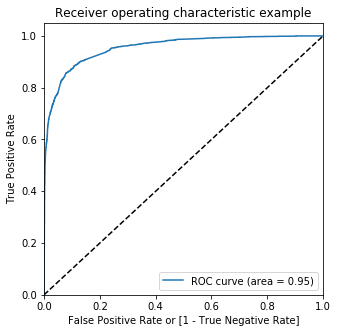

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding the optimal cut-off

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.001728          0    1    0    0    0    0    0    0   
1          0        0.204653          0    1    1    1    0    0    0    0   
2          0        0.374726          0    1    1    1    1    0    0    0   
3          1        0.996113          1    1    1    1    1    1    1    1   
4          0        0.011308          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    0    0    0

In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381515  1.000000  0.000000
0.1   0.1  0.777988  0.967809  0.660896
0.2   0.2  0.834514  0.944697  0.766548
0.3   0.3  0.886160  0.887742  0.885183
0.4   0.4  0.895764  0.857202  0.919552
0.5   0.5  0.896079  0.827487  0.938391
0.6   0.6  0.884900  0.760627  0.961558
0.7   0.7  0.877500  0.725134  0.971487
0.8   0.8  0.870572  0.692943  0.980143
0.9   0.9  0.839238  0.594305  0.990326


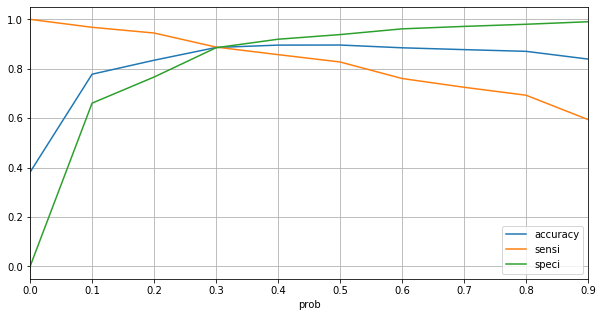

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.001728          0    1    0    0    0    0    0    0   
1          0        0.204653          0    1    1    1    0    0    0    0   
2          0        0.374726          0    1    1    1    1    0    0    0   
3          1        0.996113          1    1    1    1    1    1    1    1   
4          0        0.011308          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    1    1    1                1  
4    0    0    0                0

In [134]:
# Let's check the overall accuracy.
trainaccuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.8861596598960794

In [135]:
# Let's create updated confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3477,  451],
       [ 272, 2151]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our final model
trainsensi = TP / float(TP+FN)
trainsensi

0.8877424680148576

In [138]:
# Let us calculate specificity
trainspeci = TN / float(TN+FP)
trainspeci

0.8851832993890021

In [139]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.11481670061099797


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8266717909300538


In [141]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9274473192851427


### Precision and Recall

In [142]:
precision=precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.8923008455718736

In [143]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.8274865868757738

In [144]:
trainF1_score = 2 * (precision * recall) / (precision + recall)
trainF1_score

0.8586723768736617

## Precision and recall tradeoff

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

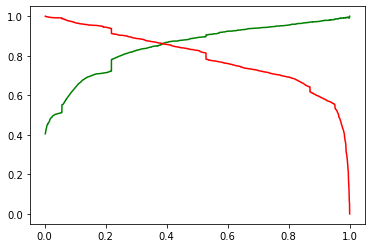

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [147]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 
                                                                       'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1461             0            0     0.655869                    -0.760684   
7926             0            0     0.295819                    -0.463262   
1909             0            0     0.655869                    -0.099746   
8971             0            0     0.295819                     2.369592   
5310             0            0     0.295819                    -0.705606   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1461              1.524665                                    0   
7926             -0.516447                                    0   
1909              0.134262                                    1   
8971              0.968504                                    1   
5310              0.968504                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1461                          0                        0   
7926                          0                        0   
1909                          0                        0   
8971                          0                        0   
5310                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1461                     0                   1                       0   
7926                     0                   0                       0   
1909                     0                   1                       0   
8971                     0                   0                       0   
5310                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1461                           0                   0                      0   
7926                           0                   0                      0   
1909                           0                   0                      0   
8971                           0                   0                      0   
5310                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1461                           0                             0   
7926                           0                             0   
1909                           0                             0   
8971                           0                             0   
5310                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1461                            0                                 0   
7926                            0                                 0   
1909                            0                                 0   
8971                            0                                 0   
5310                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1461                           0                                        0   
7926                           0                                        0   
1909                           1                                        0   
8971                           1                                        0   
5310                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1461                                      1                     0   
7926                                      1                     0   
1909                                      0                     0   
8971                                      0                     0   
5310                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1461                                      0                       0   
7926           

In [148]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Source_Olark Chat  \
1461             0                    -0.760684                       0   
7926             0                    -0.463262                       0   
1909             0                    -0.099746                       0   
8971             0                     2.369592                       0   
5310             0                    -0.705606                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
1461                      0                             0   
7926                      0                             0   
1909                      0                             0   
8971                      0                             0   
5310                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1461                                      1                     0   
7926                                      1                     0   
1909                                      0                     0   
8971                                      0                     0   
5310                                      0                     0   

      Last Activity_SMS Sent  Tags_Others  Tags_Ringing  \
1461                       0            0             1   
7926                       0            1             0   
1909                       0            1             0   
8971                       0            1             0   
5310                       1            0             1   

      Tags_Will revert after reading the email  
1461                                         0  
7926                                         0  
1909                                         0  
8971                                         0  
5310                                         0

In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
# Making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

1461    0.000374
7926    0.022517
1909    0.140826
8971    0.746498
5310    0.007373
4774    0.219249
2084    0.016575
6351    0.069493
335     0.997876
8202    0.021719
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head of y_pred_final
y_pred_1.head()

0
1461  0.000374
7926  0.022517
1909  0.140826
8971  0.746498
5310  0.007373

In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
1461          0  0.000374
7926          0  0.022517
1909          0  0.140826
8971          1  0.746498
5310          0  0.007373

In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Converted_prob
1461          0        0.000374
7926          0        0.022517
1909          0        0.140826
8971          1        0.746498
5310          0        0.007373

In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [158]:
y_pred_final.head()

Converted  Converted_prob  final_predicted
1461          0        0.000374                0
7926          0        0.022517                0
1909          0        0.140826                0
8971          1        0.746498                1
5310          0        0.007373                0

In [159]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.001728          0    1    0    0    0    0    0    0   
1          0        0.204653          0    1    1    1    0    0    0    0   
2          0        0.374726          0    1    1    1    1    0    0    0   
3          1        0.996113          1    1    1    1    1    1    1    1   
4          0        0.011308          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0                0           0  
1    0    0    0                0          20  
2    0    0    0                1          37  
3    1    1    1                1         100  
4    0    0    0                0           1

In [160]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [161]:
y_pred_final['Lead_Score']=(y_pred_final['Converted_prob']*100).astype("int64")
y_pred_final.sort_values(by='Lead_Score',ascending=False).head(10)

Converted  Converted_prob  final_predicted  Lead_Score
2783          1        0.995656                1          99
1103          1        0.997395                1          99
5818          1        0.999468                1          99
819           1        0.997430                1          99
8645          1        0.993500                1          99
1261          1        0.995652                1          99
6290          1        0.998565                1          99
3736          1        0.995652                1          99
5276          1        0.999921                1          99
4508          1        0.998016                1          99

In [162]:
Lead_Score=y_pred_final.copy()
Lead_Score.head()

Converted  Converted_prob  final_predicted  Lead_Score
1461          0        0.000374                0           0
7926          0        0.022517                0           2
1909          0        0.140826                0          14
8971          1        0.746498                1          74
5310          0        0.007373                0           0

In [163]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_Score.head()

index  Lead_Score
0   1461           0
1   7926           2
2   1909          14
3   8971          74
4   5310           0

In [164]:
Lead=lead_dup[['Prospect ID', 'Lead Number']].copy()
Lead.reset_index(level=0, inplace=True)
Lead.head()

index                           Prospect ID  Lead Number
0      0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737
1      1  2a272436-5132-4136-86fa-dcc88c88f482       660728
2      2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727
3      3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719
4      4  3256f628-e534-4826-9d63-4a8b88782852       660681

In [165]:
Lead_Score=pd.merge(Lead,Lead_Score,on='index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

Prospect ID  Lead Number  Lead_Score
0  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719           0
1  3256f628-e534-4826-9d63-4a8b88782852       660681          98
2  2058ef08-2858-443e-a01f-a9237db2f5ce       660680           5
3  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664           5
4  af465dfc-7204-4130-9e05-33231863c4b5       660616           6

As per the business, they a model to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

In [166]:
Lead_Score.sort_values(['Lead_Score'], ascending = False,inplace=True)
Lead_Score.head()

Prospect ID  Lead Number  Lead_Score
2722  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533          99
495   d8d15b44-3e4c-42b0-ae86-b6e9cbac9043       642384          99
2200  138fbe53-81c4-4aaf-8ded-2a5ef3556eb0       592530          99
1678  cbefca85-bd57-43f1-8c8e-b477385aa69e       606316          99
486   12fcbd80-953e-40fb-aaf2-96f5ff7b2961       642612          99

In [167]:
# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.8733015056922512

In [182]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1514,  197],
       [ 148,  864]], dtype=int64)

In [183]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our lmodel
testsensi=TP / float(TP+FN)
testsensi

0.8537549407114624

In [185]:
# Let us calculate specificity
testspeci= TN / float(TN+FP)
testspeci

0.8848626534190532

In [186]:
precision=precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.8143261074458058

In [187]:
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.8537549407114624

In [188]:
testF1_score=2 * (precision * recall) / (precision + recall)
testF1_score

0.833574529667149

## Final Outcome

From derived data insights we are able to design a good model to share Lead Score with sales team which will eventually help them to target hot leads & convert them into valuable customers. Table UI is made simple to make sure teams works efficenctly & improves the sales.

In [189]:
Lead_Score.head(20)

Prospect ID  Lead Number  Lead_Score
2722  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533          99
495   d8d15b44-3e4c-42b0-ae86-b6e9cbac9043       642384          99
2200  138fbe53-81c4-4aaf-8ded-2a5ef3556eb0       592530          99
1678  cbefca85-bd57-43f1-8c8e-b477385aa69e       606316          99
486   12fcbd80-953e-40fb-aaf2-96f5ff7b2961       642612          99
485   7cfb3e6d-e7e7-4f54-8909-22262d05849e       642635          99
478   0a9b1a0a-265f-49a7-9099-8890f7e5df85       642856          99
1673  623bc6c9-9184-4437-b38f-d374be49d1a3       606508          99
2211  220d9a51-1bf7-4c0e-b3c3-708523aa7f76       592334          99
1134  bcbd6036-3209-4f7e-bb22-55024482a370       623198          99
2217  52945865-7ba4-41b1-a309-810c40ac80a2       592209          99
2220  50f485d9-fe6b-463b-a933-3b46629609f2       592198          99
469   d8ada66c-170f-41a9-b406-729a88b70778       643151          99
2223  70c0b004-8022-4fd3-8a2e-eecd7851c3c3       592130          99
458   84bec27c-7b3e-4012-91e1-4aadb5a58c7a       643401          99
1144  665dff37-ecd9-4371-90cd-f075c72eaa25       622859          99
2236  a21f7a13-160b-4c6f-b424-3afccd446b20       591797          99
454   63926df7-6111-4983-83d9-0ccf2cb5f66d       643546          99
444   0fe5cf59-d155-41dc-ba39-4ef62426aa17       643918          99
442   e0032a65-ae4e-4221-b8c2-7650899f73ae       643977          99

## Model Evaluation Metrics

In [190]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensi*100),2)))
print("Train Data Specificity :{} %".format(round((trainspeci*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensi*100),2)))
print("Test Data Specificity  :{} %".format(round((testspeci*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :88.62 %
Train Data Sensitivity :88.77 %
Train Data Specificity :88.52 %
Train Data F1 Score    :0.86  
Test Data Accuracy     :87.33 %
Test Data Sensitivity  :85.38 %
Test Data Specificity  :88.49 %
Test Data F1 Score     :0.83  


In [191]:
# classification report of train data
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3928
           1       0.83      0.89      0.86      2423

    accuracy                           0.89      6351
   macro avg       0.88      0.89      0.88      6351
weighted avg       0.89      0.89      0.89      6351



In [192]:
# classification report of test data
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1711
           1       0.81      0.85      0.83      1012

    accuracy                           0.87      2723
   macro avg       0.86      0.87      0.87      2723
weighted avg       0.88      0.87      0.87      2723



### Top Features/Predictors

In [193]:
# Getting the parameters from final Model (Model 9)

pd.options.display.float_format = '{:.2f}'.format
final_parameters = res.params[1:]
final_parameters

Do Not Email                               -1.55
Total Time Spent on Website                 1.17
Lead Source_Olark Chat                      1.46
Lead Source_Reference                       4.63
Lead Source_Welingak Website                6.78
Last Activity_Olark Chat Conversation      -1.54
Last Activity_Others                        1.88
Last Activity_SMS Sent                      1.39
Tags_Others                                 2.81
Tags_Ringing                               -0.96
Tags_Will revert after reading the email    7.07
dtype: float64

In [194]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                               -21.98
Total Time Spent on Website                 16.56
Lead Source_Olark Chat                      20.72
Lead Source_Reference                       65.59
Lead Source_Welingak Website                95.98
Last Activity_Olark Chat Conversation      -21.76
Last Activity_Others                        26.55
Last Activity_SMS Sent                      19.63
Tags_Others                                 39.82
Tags_Ringing                               -13.57
Tags_Will revert after reading the email   100.00
dtype: float64

In [195]:
# Sorting the Predictor variables based on their relative coefficient values

top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Do Not Email                                 0
Total Time Spent on Website                  5
Lead Source_Olark Chat                       9
Lead Source_Reference                        1
Lead Source_Welingak Website                 7
Last Activity_Olark Chat Conversation        2
Last Activity_Others                         6
Last Activity_SMS Sent                       8
Tags_Others                                  3
Tags_Ringing                                 4
Tags_Will revert after reading the email    10
dtype: int64

<Figure size 864x576 with 0 Axes>

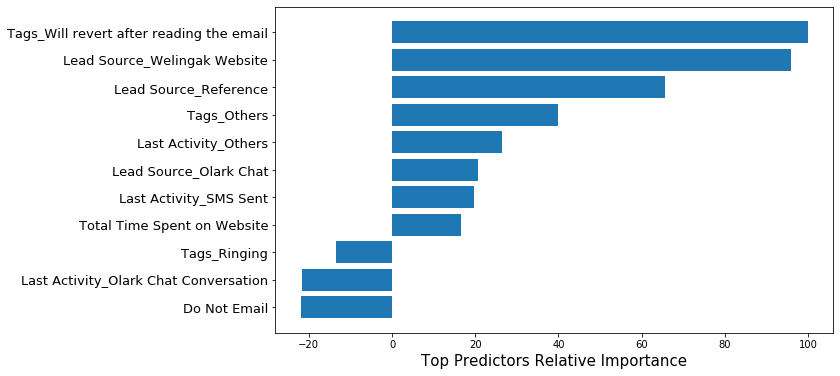

In [196]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

## Conlusion

- **~85% of Recall value indicates that our model is able to predict 85% of actual conversion cases correctly**
- **~84% of Precision value indicates that 84% of the conversions that our model predicted is actually converted**